<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [48]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 160.2 MB/s eta 0:00:0000:01


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [9]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [11]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical variable
            most_frequent = df[column].mode()[0]  # Most frequent value
            df[column].fillna(most_frequent, inplace=True)
        if df[column].dtype in ['int64','float64']:  
            mean_value = df[column].mean()  # Mean value
            df[column].fillna(mean_value, inplace=True)
    return df

In [12]:
df_ = fill_missing_values(df)

/tmp/ipykernel_299/1002055189.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
/tmp/ipykernel_299/1002055189.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [13]:
df.isnull().sum()

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [20]:
df['JobSat'].value_counts()

JobSat
6.935041     36311
8.000000      7509
7.000000      6379
6.000000      3751
9.000000      3626
10.000000     2251
5.000000      1956
3.000000      1165
4.000000      1130
2.000000       772
0.000000       311
1.000000       276
Name: count, dtype: int64

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


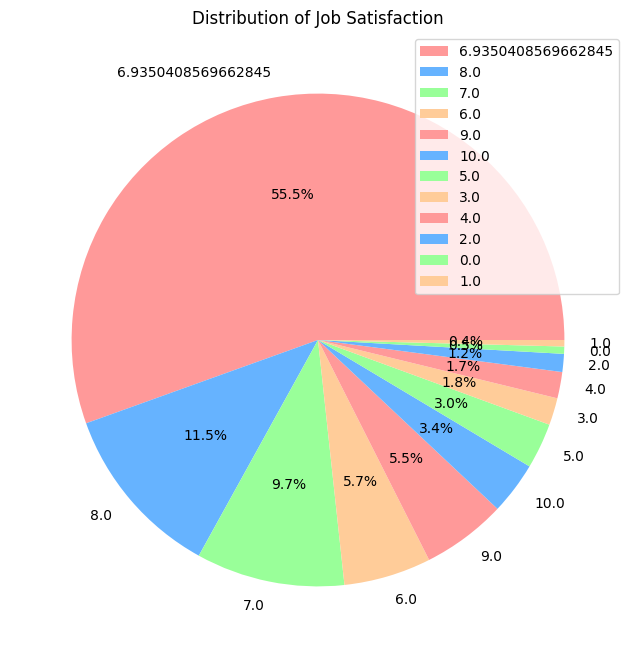

In [22]:

# Step 1: Plot the distribution of JobSat as a pie chart
plt.figure(figsize=(8, 8))
job_sat_counts = df['JobSat'].value_counts()  # Assuming JobSat is a categorical column
job_sat_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], legend=True)
plt.title('Distribution of Job Satisfaction')
plt.ylabel('')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


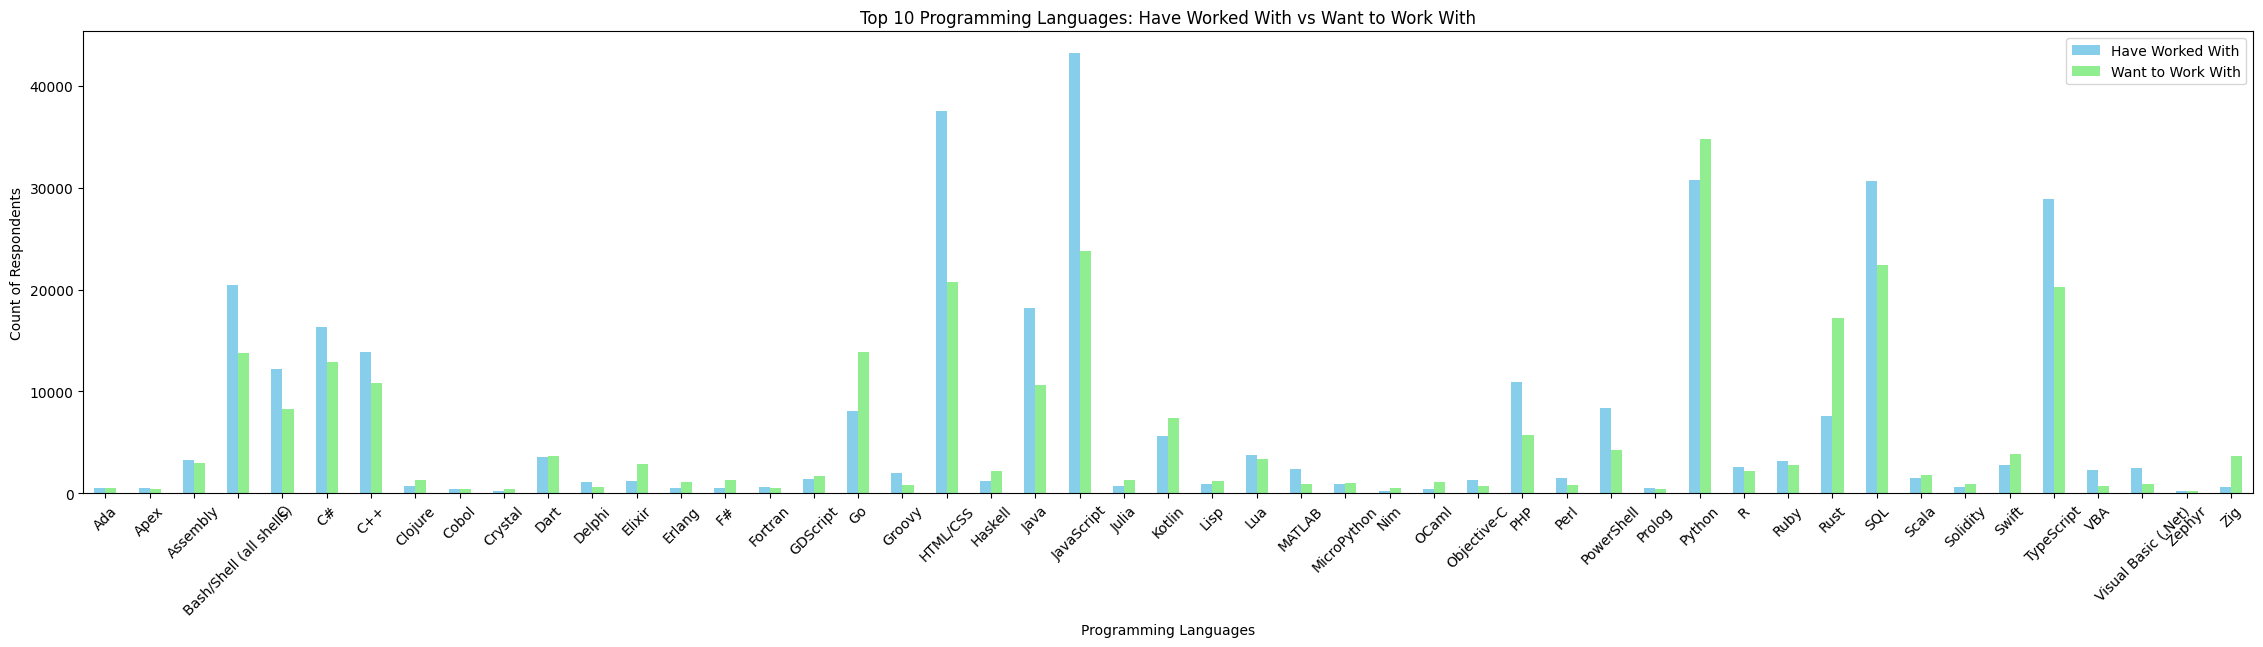

In [35]:

languages_HW = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()
languages_HW_count = languages_HW.value_counts()

languages_WW = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack()
languages_WW_count = languages_WW.value_counts()

# Combine the counts into a DataFrame for easy plotting
languages_comparison = pd.DataFrame({
    'Have Worked With': languages_HW_count,
    'Want to Work With': languages_WW_count
}).fillna(0)

# Plot the grouped bar chart
languages_comparison.plot(kind='bar', figsize=(28, 6), color=['skyblue', 'lightgreen'])
plt.title('Top 10 Programming Languages: Have Worked With vs Want to Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x800 with 0 Axes>

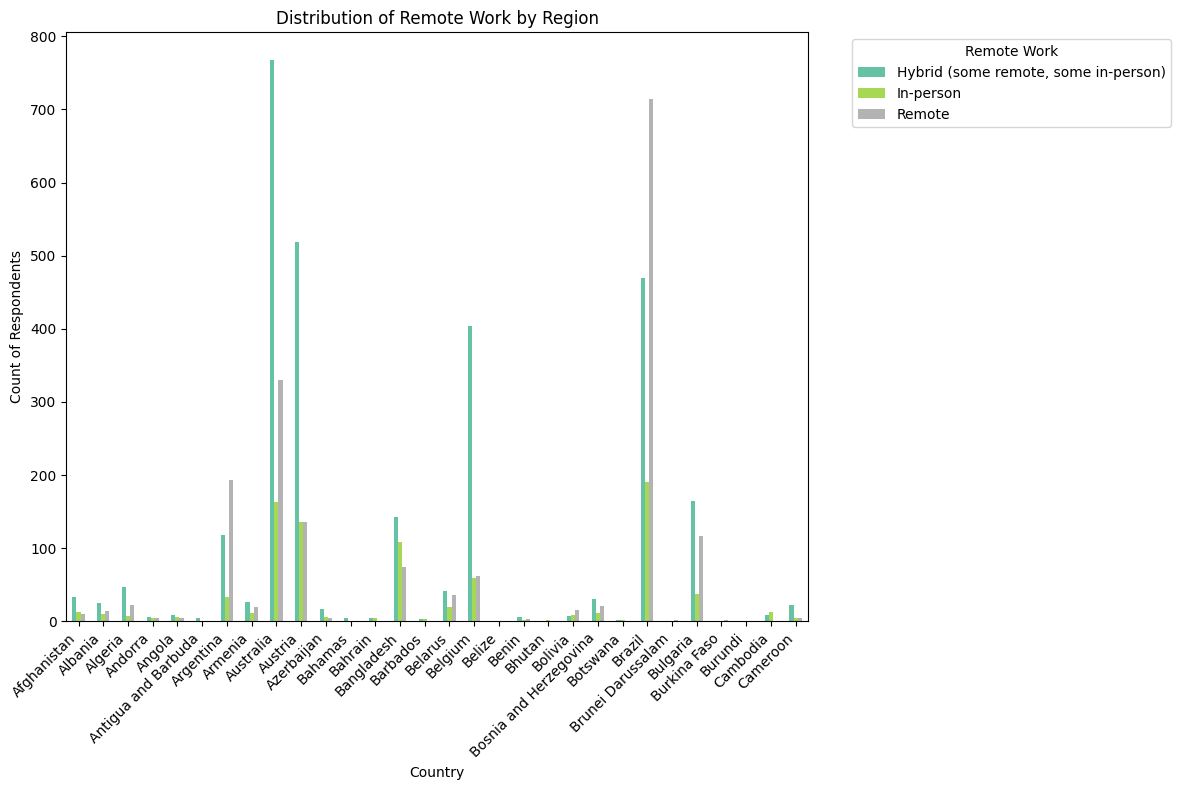

In [42]:

# Step 1: Create a cross-tabulation of RemoteWork by Country
remote_work_region = pd.crosstab(df['Country'], df['RemoteWork'])
# Step 2: Plot a grouped bar chart
plt.figure(figsize=(12, 8))
remote_work_region.head(30).plot(kind='bar', stacked=False, figsize=(12, 8), colormap='Set2')
plt.title('Distribution of Remote Work by Region')
plt.xlabel('Country')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson Correlation: 0.06962198060285024
Spearman Correlation: 0.15037624557716472


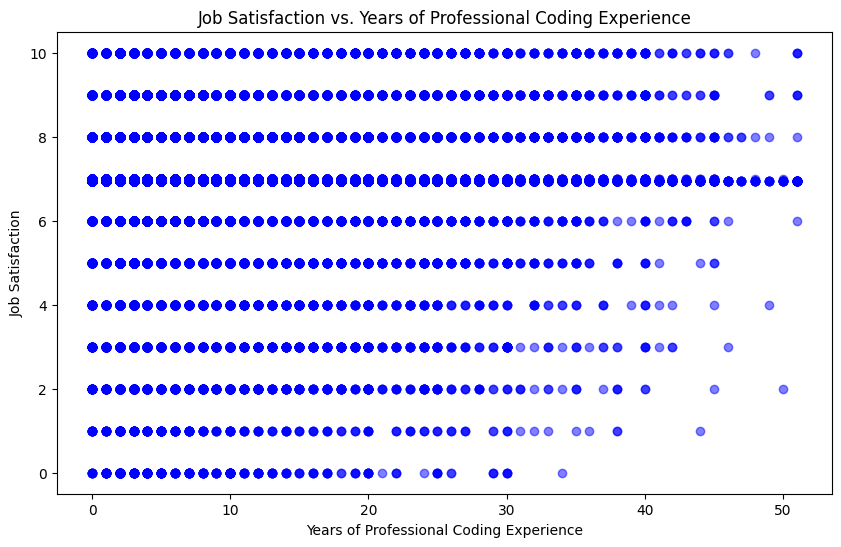

In [50]:

import scipy

df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0')
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', '51')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Calculate Pearson correlation coefficient
pearson_corr = df['JobSat'].corr(df['YearsCodePro'], method='pearson')

# Step 3: Calculate Spearman correlation coefficient
spearman_corr = df['JobSat'].corr(df['YearsCodePro'], method='spearman')

# Display the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCodePro'], df['JobSat'], alpha=0.5, color='b')
plt.title('Job Satisfaction vs. Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.show()




### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [51]:
# Step 1: Create a cross-tabulation
employment_education_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')  # Normalize to get proportions

# Step 2: Plot a stacked bar chart
employment_education_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
df.to_csv('modified_dataset_lab_13.csv', index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
